# <u> PREDICTIVE GROUP COURSEWORK - CREDIT SCORE ASSESSMENT </u>

## Table of Contents


1. **[Configuration](#config)**
  
 - 1.1 [Import Libraries](#libraries)
 - 1.2 [Set Options](#options)
 - 1.3 [Load Dataset](#data)
 
 
2. **[Data Cleaning and PreProcessing](#preprocess)**
  
 - 2.1 [Rename Variables](#rename)
 - 2.2 [Handle Duplicates](#duplicates)
 - 2.3 [Impute Missing Values](#missing_data)
 - 2.4 [Digitize Text Data](#digitizing_text)
 - 2.5 [Statistical Summary](#statistical_summary)
 - 2.6 [Outlier Detection](#outliers)
 - 2.7 [Encode Data](#encoding)
 - 2.8 [Remove Meaningless Columns](#remove_columns)
 - 2.9 [Multicollinearity Check](#multicollinearity_check)
 
 
3. **[Data Visualisation](#data_visualization)**

 - 3.1 [Customer Demographic](#customer_demographic)
 - 3.2 [Variable Distribution](#variable_distribution)
 - 3.3 [Monthly Income Analysis](#distribution3)
 - 3.4 [Gender Proportion](#distribution4)
  

4. **[Prediction Techniques](#models)**

 - 4.1 [Simple Linear Regression](#simple_regression)
    - 4.1.1 [Normality Assumption](#normality)
    - 4.1.2 [Multicollinearity Assumption](#multicollinearity_assumption)
 - 4.2 [Logistic Regression](#logistic_regression)
    - 4.2.1 [SMOTE](#smote)
 - 4.3 [Decision Trees Classification](#decision_tree_regression)
 - 4.4 [Random Forest](#random_forrest)
 - 4.5 [ADA Boosting](#ada_boosting)
 - 4.6 [Support Vector Classifier](#support_vector)
 - 4.7 [Neural Network](#neural_network)
   
    
5. **[Conclusions](#conclusion)**
 - 5.1 [Model Evaluation](#evaluation)

### Improved Readability of Code : Full-width display

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 1. Configuration <a id='config'></a>

## 1.1 Import Libraries <a id='libraries'></a>

In [2]:
# Packages necessary for Data Analysis
!pip install imblearn
!pip install keras
!pip install tabulate
!pip install imblearn
!pip install pydotplus
!pip install tensorflow

# Libraries necessary for Data Analysis
import os
import numpy as np
import pandas as pd
import re

# Libraries for Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries common for Predictive Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import normal_ad

# Libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Libraries for Decision Trees
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
from six import StringIO

# Libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Libraries for ADA Boosting
from sklearn.ensemble import AdaBoostClassifier

# Libraries for Support Vector Classifier
from sklearn import svm

# Libraries for Neural Network
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# Libraries for Model Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score, roc_auc_score, RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix
from tabulate import tabulate

# Libraries for Code Enhancement
from tqdm import tqdm # Create Progress Bars
import warnings
warnings.filterwarnings('ignore') # Ignore Warnings
from IPython.display import Image # Save Visualisations for report

print("Libraries and Dependencies Successfully Installed")

2022-12-13 01:41:24.738081: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 01:41:24.886774: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-13 01:41:24.886801: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-13 01:41:25.536676: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

Libraries and Dependencies Successfully Installed


## 1.2 Set Options <a id='options'></a>

In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.4f}'.format

## 1.3 Load Dataset <a id='data'></a>

In [4]:
# Read the dataset and convert text file to csv
CSdata_df = pd.read_table('https://raw.githubusercontent.com/Clarin19/Credit-Risk-Assessment/main/CSdata.txt')
CSdata_df.to_csv('CSdata.csv')

# Display the first 5 rows
CSdata_df.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL.1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0000,15.0000,N,1,900.0000,0.0000,1,1,0,0,0,0,0,0.0000,0,N,,NaN,NaN,N,,0,9.0000,4.0000,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0000,1.0000,N,1,750.0000,0.0000,0,0,0,0,0,0,0,0.0000,0,Y,,NaN,NaN,N,,0,11.0000,4.0000,11.0000,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0000,NaN,N,1,500.0000,0.0000,0,0,0,0,0,0,0,0.0000,0,N,,NaN,NaN,N,,0,11.0000,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0000,0.0000,0,0,0,0,0,0,0,0.0000,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0000,12.0000,N,1,1200.0000,0.0000,0,0,0,0,0,0,0,0.0000,0,N,,NaN,NaN,N,,0,9.0000,5.0000,NaN,NaN,0,0,0,0,1,N,48,235,235,1


**Observations:** It is observed that there are incorrect/meaningless column names in the dataset along with missing values for few variables. The dataset must be cleaned before any valuable inferences can be deduced.

# 2. Data Cleaning And Pre-processing<a id='preprocess'></a>

## 2.1 Rename Variables <a id='rename'></a>

In [5]:
CSdata_df.rename(columns = {'QUANT_DEPENDANTS' : 'QUANT_DEPENDENTS', 'NACIONALITY':'NATIONALITY','RESIDENCIAL_STATE':'RESIDENTIAL_STATE',
                                       'RESIDENCIAL_CITY':'RESIDENTIAL_CITY', 'RESIDENCIAL_BOROUGH':'RESIDENTIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE':'FLAG_RESIDENTIAL_PHONE',
                                       'RESIDENCIAL_PHONE_AREA_CODE':'RESIDENTIAL_PHONE_AREA_CODE', 'OTHER_INCOMES':'OTHER_INCOME','MONTHS_IN_THE_JOB':'MONTHS_IN_JOB',
                                       'RESIDENCIAL_ZIP_3':'RESIDENTIAL_ZIP_3','EDUCATION_LEVEL.1':'MATE_EDUCATION_LEVEL'}, inplace=True)

## 2.2 Handle Duplicates <a id='duplicates'></a>

In [6]:
# Drop duplicates
print("Shape before: ", CSdata_df.shape)
CSdata_df.drop(CSdata_df[CSdata_df.duplicated(keep="first")].index, inplace=True)
print("Shape after: ", CSdata_df.shape)

Shape before:  (50000, 54)
Shape after:  (50000, 54)


**Observations:** It is observed that there are no duplicates in the dataset.

In [7]:
# Displaying vairable information of the dataset
CSdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDENTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NATIONALITY                     

**Observations:** It is observed that there are multiple variables with significant null values in the dataset. It is therefore necessary to impute missing values.

## 2.3 Impute Missing Values <a id='missing_data'></a>

**Observations:** 

    It is observed that there is one row with ValueError: Unable to parse string "#DIV/0!" at position 48923
    UserID:48923 has incorrect data which cannot be processed and therefore this data row is removed from the dataset

In [8]:
CSdata_df.drop(CSdata_df.index[48923], axis=0, inplace=True)

In [9]:
# convert ' ' data to null
for i in CSdata_df.columns:
    CSdata_df[i]=CSdata_df[i].replace(r'^\s*$', np.nan, regex=True)

# Calculate the proportion of missing data
rate = CSdata_df.apply(lambda x: sum(x.isnull()) / len(x), axis=0)
print('The missing rate of each attribute is: \n')
print(rate)

The missing rate of each attribute is: 

ID_CLIENT                        0.0000
CLERK_TYPE                       0.0000
PAYMENT_DAY                      0.0000
APPLICATION_SUBMISSION_TYPE      0.0000
QUANT_ADDITIONAL_CARDS           0.0000
POSTAL_ADDRESS_TYPE              0.0000
SEX                              0.0003
MARITAL_STATUS                   0.0000
QUANT_DEPENDENTS                 0.0000
EDUCATION_LEVEL                  0.0000
STATE_OF_BIRTH                   0.0413
CITY_OF_BIRTH                    0.0413
NATIONALITY                      0.0000
RESIDENTIAL_STATE                0.0000
RESIDENTIAL_CITY                 0.0000
RESIDENTIAL_BOROUGH              0.0002
FLAG_RESIDENTIAL_PHONE           0.0000
RESIDENTIAL_PHONE_AREA_CODE      0.1642
RESIDENCE_TYPE                   0.0270
MONTHS_IN_RESIDENCE              0.0755
FLAG_MOBILE_PHONE                0.0000
FLAG_EMAIL                       0.0000
PERSONAL_MONTHLY_INCOME          0.0000
OTHER_INCOME                     0.0000

**Observations:** 

The variables with more than 50% of values missing mentioned below are discarded, since they do not help in development of an accurate prediction model.

    PROFESSIONAL_STATE             -    68.61 % missing values
    PROFESSIONAL_CITY              -    68.22 % missing values
    PROFESSIONAL_BOROUGH           -    69.42 % missing values
    PROFESSIONAL_PHONE_AREA_CODE   -    73.06 % missing values
    MATE_PROFESSION_CODE           -    57.76 % missing values
    MATE_EDUCATION_LEVEL           -    64.67 % missing values
    
The variables with less than 50% of values missing mentioned below are considered after handling missing values.

    SEX                            -    00.03 % missing values
    STATE_OF_BIRTH                 -    04.13 % missing values
    CITY_OF_BIRTH                  -    04.13 % missing values
    RESIDENTIAL_BOROUGH            -    00.02 % missing values
    RESIDENTIAL_PHONE_AREA_CODE    -    16.42 % missing values
    RESIDENCE_TYPE                 -    02.70 % missing values
    MONTHS_IN_RESIDENCE            -    07.55 % missing values
    PROFESSION_CODE                -    15.51 % missing values
    OCCUPATION_TYPE                -    14.63 % missing values

In [10]:
# Delete columns with a missing rate greater than 50%
missing_data_list = []
for i in range(len(rate)):
    if rate[i] > 0.5:
        missing_data_list.append(rate.index[i])

print("Shape before: ", CSdata_df.shape)
for i in missing_data_list:
    CSdata_df.drop(columns=[i], axis=1, inplace=True)
print("Shape after: ", CSdata_df.shape)

Shape before:  (49999, 54)
Shape after:  (49999, 48)


In [11]:
# Creating lists for missing object and missing int float data types
missing_data_list_1 = []
for i in range(len(rate)):
    if rate[i] != 0 and rate.index[i] not in missing_data_list:
        missing_data_list_1.append(rate.index[i])

missing_data_list_object = []
missing_data_list_int_float = []
for i in range(0,5):
    missing_data_list_object.append(missing_data_list_1[i])
for i in missing_data_list_1:
    if i not in missing_data_list_object:
        missing_data_list_int_float.append(i)

print('The missing object data list:')
print(missing_data_list_object)

print('\nThe missing int and float data list:')
print(missing_data_list_int_float)

The missing object data list:
['SEX', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'RESIDENTIAL_BOROUGH', 'RESIDENTIAL_PHONE_AREA_CODE']

The missing int and float data list:
['RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'PROFESSION_CODE', 'OCCUPATION_TYPE']


In [12]:
# Filling vacancies in missing object data type list
for i in missing_data_list_object:
    CSdata_df[i].fillna(method='ffill', inplace=True)

# Filling vacancies in missing int float data type list
for i in missing_data_list_int_float:
    fill_data = round(CSdata_df[i].mean(), 0)
    CSdata_df[i] = CSdata_df[i].fillna(fill_data)

rate_fill = CSdata_df.apply(lambda x: sum(x.isnull()) / len(x), axis=0)
print('The missing rate of each attribute after filling vacancies: \n')
print(rate_fill)

The missing rate of each attribute after filling vacancies: 

ID_CLIENT                        0.0000
CLERK_TYPE                       0.0000
PAYMENT_DAY                      0.0000
APPLICATION_SUBMISSION_TYPE      0.0000
QUANT_ADDITIONAL_CARDS           0.0000
POSTAL_ADDRESS_TYPE              0.0000
SEX                              0.0000
MARITAL_STATUS                   0.0000
QUANT_DEPENDENTS                 0.0000
EDUCATION_LEVEL                  0.0000
STATE_OF_BIRTH                   0.0000
CITY_OF_BIRTH                    0.0000
NATIONALITY                      0.0000
RESIDENTIAL_STATE                0.0000
RESIDENTIAL_CITY                 0.0000
RESIDENTIAL_BOROUGH              0.0000
FLAG_RESIDENTIAL_PHONE           0.0000
RESIDENTIAL_PHONE_AREA_CODE      0.0000
RESIDENCE_TYPE                   0.0000
MONTHS_IN_RESIDENCE              0.0000
FLAG_MOBILE_PHONE                0.0000
FLAG_EMAIL                       0.0000
PERSONAL_MONTHLY_INCOME          0.0000
OTHER_INCOME      

## 2.4 Digitize Text Data <a id='digitizing_text'></a>

In [13]:
# Displaying variable information
CSdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49999
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       49999 non-null  int64  
 1   CLERK_TYPE                      49999 non-null  object 
 2   PAYMENT_DAY                     49999 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     49999 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          49999 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             49999 non-null  int64  
 6   SEX                             49999 non-null  object 
 7   MARITAL_STATUS                  49999 non-null  int64  
 8   QUANT_DEPENDENTS                49999 non-null  int64  
 9   EDUCATION_LEVEL                 49999 non-null  int64  
 10  STATE_OF_BIRTH                  49999 non-null  object 
 11  CITY_OF_BIRTH                   49999 non-null  object 
 12  NATIONALITY                     

**Observations:** 

RESIDENTIAL_PHONE_AREA_CODE, RESIDENTIAL_ZIP_3, PROFESSIONAL_ZIP_3 are numerical data, but the data type corresponding to these variables has been declared as object

In [14]:
# Finding columns with object data type
object_list = []
for c in CSdata_df.columns:
   data_type = CSdata_df[c].dtype
   if data_type == 'object':
       object_list.append(c)

print('\nThe list of vairables with object data type:')
print(object_list)


The list of vairables with object data type:
['CLERK_TYPE', 'APPLICATION_SUBMISSION_TYPE', 'SEX', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'RESIDENTIAL_STATE', 'RESIDENTIAL_CITY', 'RESIDENTIAL_BOROUGH', 'FLAG_RESIDENTIAL_PHONE', 'RESIDENTIAL_PHONE_AREA_CODE', 'FLAG_MOBILE_PHONE', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE', 'FLAG_ACSP_RECORD', 'RESIDENTIAL_ZIP_3', 'PROFESSIONAL_ZIP_3']


In [15]:
# Converting the object types to their correct data type
num_object_list = ['RESIDENTIAL_PHONE_AREA_CODE', 'RESIDENTIAL_ZIP_3', 'PROFESSIONAL_ZIP_3']

# Convert file type
for i in num_object_list:
    CSdata_df[i] = CSdata_df[i].astype('float')

CSdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49999
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       49999 non-null  int64  
 1   CLERK_TYPE                      49999 non-null  object 
 2   PAYMENT_DAY                     49999 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     49999 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          49999 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             49999 non-null  int64  
 6   SEX                             49999 non-null  object 
 7   MARITAL_STATUS                  49999 non-null  int64  
 8   QUANT_DEPENDENTS                49999 non-null  int64  
 9   EDUCATION_LEVEL                 49999 non-null  int64  
 10  STATE_OF_BIRTH                  49999 non-null  object 
 11  CITY_OF_BIRTH                   49999 non-null  object 
 12  NATIONALITY                     

## 2.5 Statistical Summary <a id='statistical_summary'></a>

In [16]:
#Statistical Summary
CSdata_df.describe()

,ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDENTS,EDUCATION_LEVEL,NATIONALITY,RESIDENTIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOME,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_JOB,PROFESSION_CODE,OCCUPATION_TYPE,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,RESIDENTIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
count,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000,49999.0000
mean,25000.0215,12.8697,0.0000,1.0065,2.1484,0.6505,0.0000,0.9616,64.5334,1.2453,9.7478,0.8023,886.6882,35.4355,0.1114,0.0974,0.0013,0.0017,0.0020,0.3578,0.3578,2322.4188,0.3361,0.0093,8.0522,2.4134,0.0000,0.0000,0.0000,0.0000,1.2757,43.2489,585.1658,585.1658,0.2608
std,14433.6489,6.6082,0.0000,0.0806,1.3229,1.1937,0.0000,0.2021,38.5550,0.8569,10.2583,0.3983,7847.0375,891.5240,0.3147,0.2966,0.0363,0.0417,0.0451,0.4800,0.4800,42358.4067,0.4724,0.3835,2.9599,1.4261,0.0000,0.0000,0.0000,0.0000,0.9883,14.9890,227.7752,227.7752,0.4391
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,60.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,6.0000,105.0000,105.0000,0.0000
25%,12500.5000,10.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,27.0000,1.0000,2.0000,1.0000,360.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,2.0000,0.0000,0.0000,0.0000,0.0000,1.0000,31.0000,450.0000,450.0000,0.0000
50%,25000.0000,10.0000,0.0000,1.0000,2.0000,0.0000,0.0000,1.0000,68.0000,1.0000,7.0000,1.0000,500.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0000,2.0000,0.0000,0.0000,0.0000,0.0000,1.0000,41.0000,600.0000,600.0000,0.0000
75%,37499.5000,15.0000,0.0000,1.0000,2.0000,1.0000,0.0000,1.0000,100.0000,1.0000,14.0000,1.0000,800.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,9.0000,4.0000,0.0000,0.0000,0.0000,0.0000,1.0000,53.0000,737.0000,737.0000,1.0000
max,50000.0000,25.0000,0.0000,2.0000,7.0000,53.0000,0.0000,2.0000,126.0000,5.0000,228.0000,1.0000,959000.0000,194344.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,6000000.0000,1.0000,35.0000,18.0000,5.0000,0.0000,0.0000,0.0000,0.0000,7.0000,106.0000,999.0000,999.0000,1.0000


## 2.6 Outlier Detection <a id='outliers'></a>

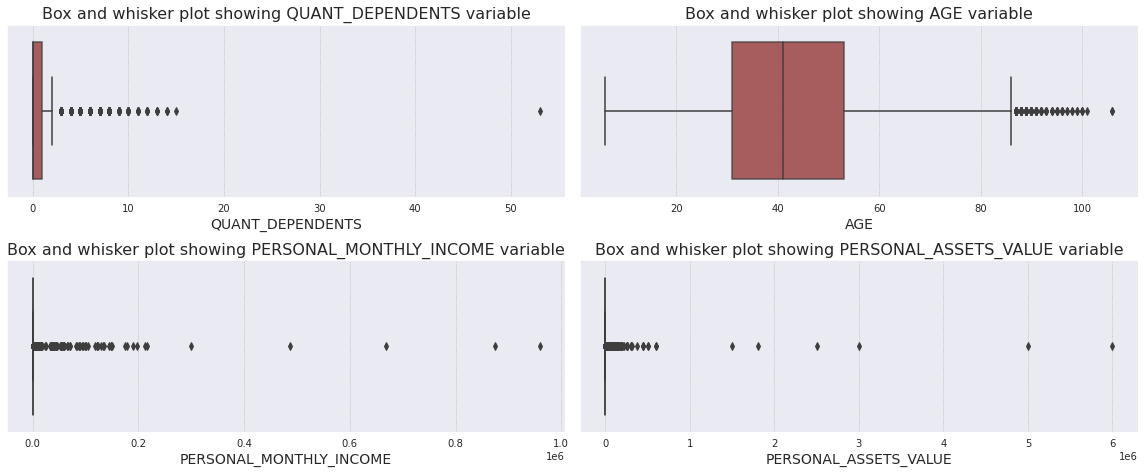

In [17]:
# Find outliers for numeric data
# PAYMENT_DAY, PERSONAL_MONTHLY_INCOME, OTHER_INCOMES, PERSONAL_ASSETS_VALUE, QUANT_CARS, MONTHS_IN_THE_JOB, AGE

sns.set_style("darkgrid", {"grid.color": ".7", "grid.linestyle": ":"})
sns.set_color_codes("dark")

temp_csdata_df = CSdata_df.copy()
temp_numerical_columns = ['QUANT_DEPENDENTS','AGE','PERSONAL_MONTHLY_INCOME','PERSONAL_ASSETS_VALUE']

fig = plt.figure(figsize=(16, 16))

for i in range(1, 5) :
    axes = fig.add_subplot(5, 2, i)
    axes.set_title("Box and whisker plot showing {} variable".format(str(temp_numerical_columns[i-1])), size=16)
    axes.set_xlabel(str(temp_numerical_columns[i-1]), fontsize=14)
    sns.boxplot(x=temp_csdata_df[temp_numerical_columns[i-1]],  boxprops=dict(alpha=.8), color="brown")
    plt.tight_layout()
    
plt.savefig("boxplot2.png")

In [18]:
# Dropping data row with QUANT_DEPENDENTS > 15 from the dataset
CSdata_df.drop(CSdata_df[CSdata_df.QUANT_DEPENDENTS > 15].index,
                axis=0, inplace=True)

**Observations:** 

    While there are multiple outliers in dataset in terms of their income, age, etc, they are not discarded as they represent varied customers from different backgrounds.
    
    However, it is observed that there is an unexplained extreme outlier of 53 dependants present in our dataset for the variable QUANT_DEPENDENTS. 
    Therefore, setting the limit for considered training dataset for QUANT_DEPENDENTS at a maximum of 15.

In [19]:
CSdata_df.describe()

,ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDENTS,EDUCATION_LEVEL,NATIONALITY,RESIDENTIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOME,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_JOB,PROFESSION_CODE,OCCUPATION_TYPE,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,RESIDENTIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
count,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000,49998.0000
mean,24999.7122,12.8695,0.0000,1.0065,2.1484,0.6495,0.0000,0.9616,64.5327,1.2453,9.7475,0.8023,886.6939,35.4362,0.1114,0.0974,0.0013,0.0017,0.0020,0.3578,0.3578,2322.4653,0.3362,0.0093,8.0522,2.4134,0.0000,0.0000,0.0000,0.0000,1.2757,43.2488,585.1668,585.1668,0.2608
std,14433.6275,6.6082,0.0000,0.0806,1.3229,1.1705,0.0000,0.2021,38.5551,0.8569,10.2583,0.3983,7847.1159,891.5329,0.3147,0.2966,0.0363,0.0417,0.0451,0.4800,0.4800,42358.8291,0.4724,0.3835,2.9600,1.4261,0.0000,0.0000,0.0000,0.0000,0.9883,14.9891,227.7773,227.7773,0.4391
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,60.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,6.0000,105.0000,105.0000,0.0000
25%,12500.2500,10.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,27.0000,1.0000,2.0000,1.0000,360.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,2.0000,0.0000,0.0000,0.0000,0.0000,1.0000,31.0000,450.0000,450.0000,0.0000
50%,24999.5000,10.0000,0.0000,1.0000,2.0000,0.0000,0.0000,1.0000,68.0000,1.0000,7.0000,1.0000,500.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0000,2.0000,0.0000,0.0000,0.0000,0.0000,1.0000,41.0000,600.0000,600.0000,0.0000
75%,37498.7500,15.0000,0.0000,1.0000,2.0000,1.0000,0.0000,1.0000,100.0000,1.0000,14.0000,1.0000,800.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,9.0000,4.0000,0.0000,0.0000,0.0000,0.0000,1.0000,53.0000,737.0000,737.0000,1.0000
max,50000.0000,25.0000,0.0000,2.0000,7.0000,15.0000,0.0000,2.0000,126.0000,5.0000,228.0000,1.0000,959000.0000,194344.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,6000000.0000,1.0000,35.0000,18.0000,5.0000,0.0000,0.0000,0.0000,0.0000,7.0000,106.0000,999.0000,999.0000,1.0000


## 2.7 Encode Data <a id='encoding'></a>

In [20]:
# Define a function to perform encoding of categorical columns
def encode(columns):
    No_dict = {}
    num_item = 0

    Item_list = CSdata_df[columns].unique()

    for target in Item_list:
        num_item = num_item + 1
        No_dict[target] = num_item

    CSdata_df[columns] = CSdata_df[columns].map(No_dict)

In [21]:
# Encoding address string text data
address_object_list = ['CITY_OF_BIRTH', 'RESIDENTIAL_CITY', 'RESIDENTIAL_BOROUGH']

for i in tqdm(address_object_list):
    encode(i)

CSdata_df.head()

100%|██████████| 3/3 [00:00<00:00, 60.53it/s]


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDENTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NATIONALITY,RESIDENTIAL_STATE,RESIDENTIAL_CITY,RESIDENTIAL_BOROUGH,FLAG_RESIDENTIAL_PHONE,RESIDENTIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOME,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_JOB,PROFESSION_CODE,OCCUPATION_TYPE,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENTIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,1,1,RN,1,1,Y,105.0000,1.0000,15.0000,N,1,900.0000,0.0000,1,1,0,0,0,0,0,0.0000,0,N,N,0,9.0000,4.0000,0,0,0,0,1,N,32,595.0000,595.0000,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,2,1,RJ,2,2,Y,20.0000,1.0000,1.0000,N,1,750.0000,0.0000,0,0,0,0,0,0,0,0.0000,0,Y,N,0,11.0000,4.0000,0,0,0,0,1,N,34,230.0000,230.0000,1
2,3,C,5,Web,0,1,F,2,0,0,RN,3,1,RN,3,3,Y,105.0000,1.0000,10.0000,N,1,500.0000,0.0000,0,0,0,0,0,0,0,0.0000,0,N,N,0,11.0000,2.0000,0,0,0,0,1,N,27,591.0000,591.0000,0
3,4,C,20,Web,0,1,F,2,0,0,PE,4,1,PE,4,4,N,105.0000,1.0000,10.0000,N,1,500.0000,0.0000,0,0,0,0,0,0,0,0.0000,0,N,N,0,8.0000,2.0000,0,0,0,0,1,N,61,545.0000,545.0000,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,5,1,RJ,5,5,Y,20.0000,1.0000,12.0000,N,1,1200.0000,0.0000,0,0,0,0,0,0,0,0.0000,0,N,N,0,9.0000,5.0000,0,0,0,0,1,N,48,235.0000,235.0000,1


In [22]:
# Encode flag string text data

for i in tqdm(object_list):
    if i not in num_object_list and i not in address_object_list:
        encode(i)

CSdata_df.head()

100%|██████████| 16/16 [00:00<00:00, 303.43it/s]


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDENTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NATIONALITY,RESIDENTIAL_STATE,RESIDENTIAL_CITY,RESIDENTIAL_BOROUGH,FLAG_RESIDENTIAL_PHONE,RESIDENTIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOME,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_JOB,PROFESSION_CODE,OCCUPATION_TYPE,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENTIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,1,5,1,0,1,1,6,1,0,1,1,1,1,1,1,1,105.0000,1.0000,15.0000,1,1,900.0000,0.0000,1,1,0,0,0,0,0,0.0000,0,1,1,0,9.0000,4.0000,0,0,0,0,1,1,32,595.0000,595.0000,1
1,2,1,15,2,0,1,1,2,0,0,2,2,1,2,2,2,1,20.0000,1.0000,1.0000,1,1,750.0000,0.0000,0,0,0,0,0,0,0,0.0000,0,2,1,0,11.0000,4.0000,0,0,0,0,1,1,34,230.0000,230.0000,1
2,3,1,5,1,0,1,1,2,0,0,1,3,1,1,3,3,1,105.0000,1.0000,10.0000,1,1,500.0000,0.0000,0,0,0,0,0,0,0,0.0000,0,1,1,0,11.0000,2.0000,0,0,0,0,1,1,27,591.0000,591.0000,0
3,4,1,20,1,0,1,1,2,0,0,3,4,1,3,4,4,2,105.0000,1.0000,10.0000,1,1,500.0000,0.0000,0,0,0,0,0,0,0,0.0000,0,1,1,0,8.0000,2.0000,0,0,0,0,1,1,61,545.0000,545.0000,0
4,5,1,10,1,0,1,2,2,0,0,2,5,1,2,5,5,1,20.0000,1.0000,12.0000,1,1,1200.0000,0.0000,0,0,0,0,0,0,0,0.0000,0,1,1,0,9.0000,5.0000,0,0,0,0,1,1,48,235.0000,235.0000,1


## 2.8 Remove Meaningless Columns<a id='remove_columns'></a>

In [23]:
#Remove variables with only one value

print("Unique Column Information Before Pop:\n")
print(CSdata_df.nunique())

for col in CSdata_df:
    if (len(CSdata_df.loc[:, col].unique()) == 1):
        CSdata_df.pop(col)
        
print("\nUnique Column Information After Pop:\n")
print(CSdata_df.nunique())

Unique Column Information Before Pop:

ID_CLIENT                         49998
CLERK_TYPE                            1
PAYMENT_DAY                           6
APPLICATION_SUBMISSION_TYPE           3
QUANT_ADDITIONAL_CARDS                1
POSTAL_ADDRESS_TYPE                   2
SEX                                   3
MARITAL_STATUS                        8
QUANT_DEPENDENTS                     16
EDUCATION_LEVEL                       1
STATE_OF_BIRTH                       28
CITY_OF_BIRTH                      9909
NATIONALITY                           3
RESIDENTIAL_STATE                    27
RESIDENTIAL_CITY                   3529
RESIDENTIAL_BOROUGH               14509
FLAG_RESIDENTIAL_PHONE                2
RESIDENTIAL_PHONE_AREA_CODE         101
RESIDENCE_TYPE                        6
MONTHS_IN_RESIDENCE                  88
FLAG_MOBILE_PHONE                     1
FLAG_EMAIL                            2
PERSONAL_MONTHLY_INCOME            5495
OTHER_INCOME                        615
F

**Observations:** 

    It is important to note that the columns 'CITY_OF_BIRTH', 'RESIDENTIAL_CITY'and 'RESIDENTIAL_BOROUGH' have been encoded from their prior categoric form. 
    Address corresponding to an encoded digit higher than another does not indicate a higher criterion on prediction.
    Therefore, encoded address field do not aid in deducing useful inferences in prediction models, and can be discarded

In [24]:
# Delete address column
address_object_list = ['CITY_OF_BIRTH', 'RESIDENTIAL_CITY', 'RESIDENTIAL_BOROUGH']

print("Shape before: ", CSdata_df.shape)

for i in address_object_list:
    CSdata_df.drop(columns=[i], axis=1, inplace=True)
    
print("Shape after: ", CSdata_df.shape)

Shape before:  (49998, 39)
Shape after:  (49998, 36)


**Observations:** 

    Variable ID_CLIENT is a Unique Sequential Number (Key) corresponding to the applicant and poses no influence on the credit risk assessment, it is therefore discarded

In [25]:
# Drop ID_CLIENT variable
CSdata_df.drop(columns=['ID_CLIENT'], axis=1, inplace=True)

## 2.9 Multicollinearity Check <a id='multicollinearity_check'></a>

    Multicollinearity assumes that predictors are not correlated with each other. 
    
    If there is correlation among the predictors, then either prepdictors with high Variance Inflation Factor (VIF) values must be removed or dimensionality reduction must be performed. 
    
    This assumption being violated causes issues with interpretability of the coefficients and the standard errors of the coefficients.

In [26]:
# Defining a function to check multicollinearity

def multicollinearity_assumption(features, feature_names=None):
    print('Assumption: Little to no multicollinearity among predictors')
    
    # Plotting the heatmap
    plt.figure(figsize = (30,30))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()

    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')

    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))

    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption: Little to no multicollinearity among predictors


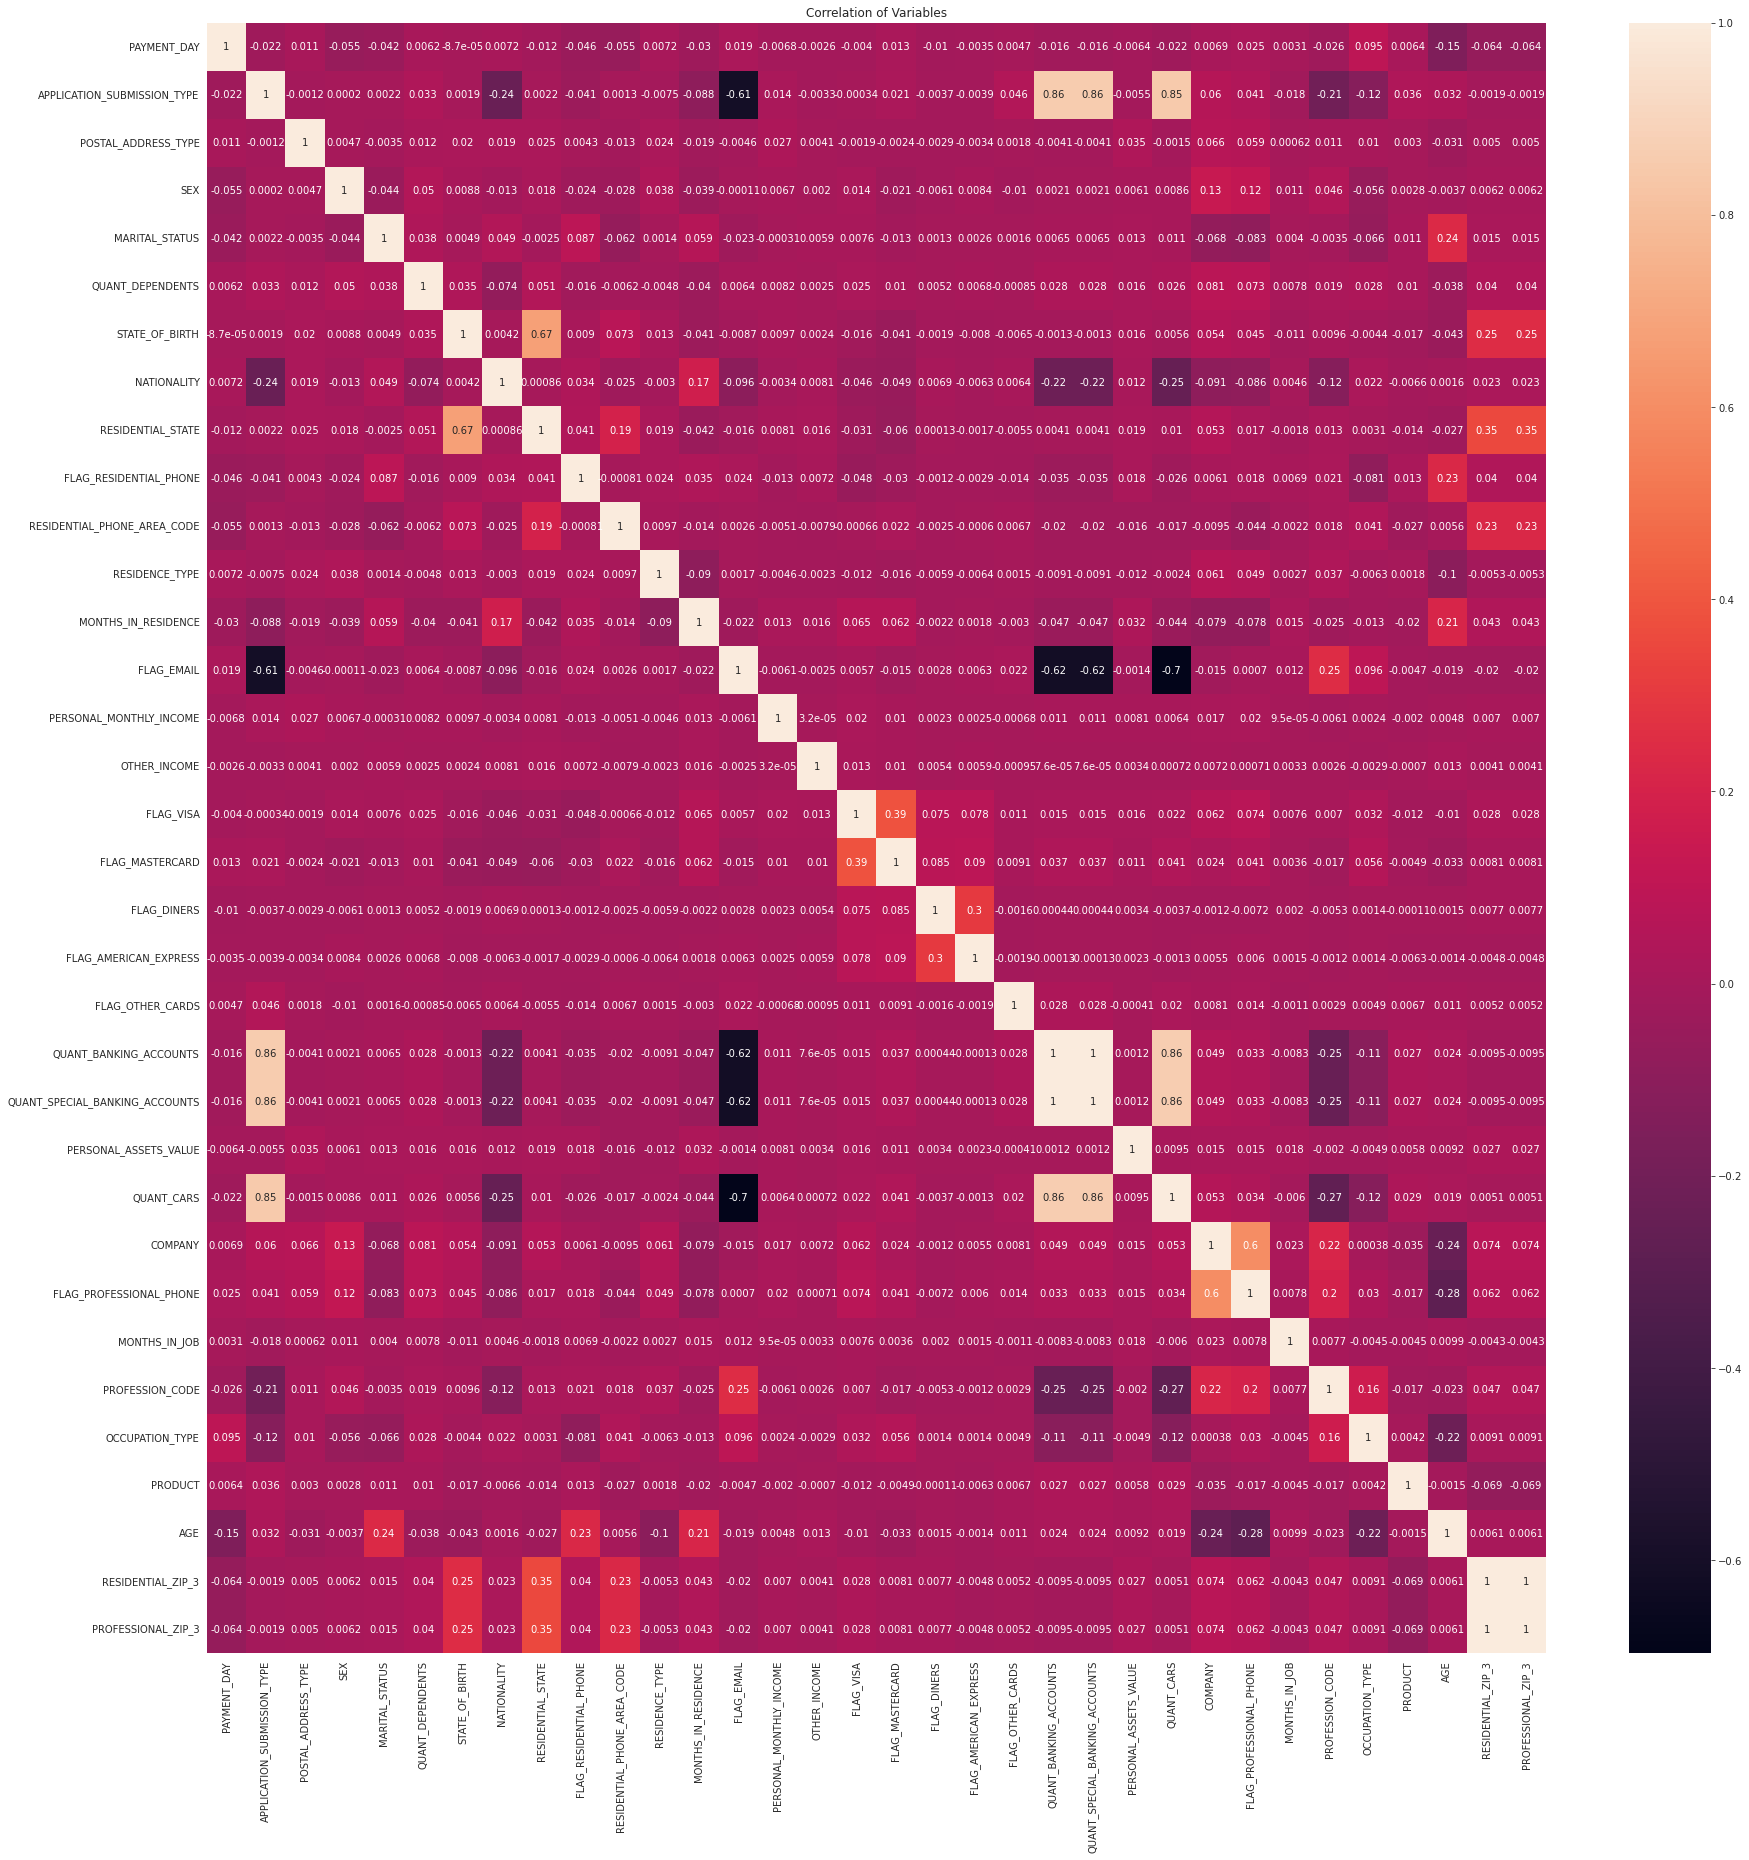

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
PAYMENT_DAY: 4.860670541796682
APPLICATION_SUBMISSION_TYPE: 20.943398938915667
POSTAL_ADDRESS_TYPE: 78.79718062509583
SEX: 9.15895067927147
MARITAL_STATUS: 3.909561930128185
QUANT_DEPENDENTS: 1.3373936897615575
STATE_OF_BIRTH: 5.710054115964873
NATIONALITY: 26.014043639454325
RESIDENTIAL_STATE: 6.658015766934609
FLAG_RESIDENTIAL_PHONE: 11.619369479191427
RESIDENTIAL_PHONE_AREA_CODE: 4.137698948086175
RESIDENCE_TYPE: 3.1708597684926847
MONTHS_IN_RESIDENCE: 2.1265268105577104
FLAG_EMAIL: 10.253169356140075
PERSONAL_MONTHLY_INCOME: 1.015199254314363
OTHER_INCOME: 1.002910980858869
FLAG_VISA: 1.3453432953766404
FLAG_MASTERCARD: 1.3272235932014445
FLAG_DINERS: 1.1084388004201386
FLAG_AMERICAN_EXPRESS: 1.109651610300348
FLAG_OTHER_CARDS: 1.0094215186431998
QUANT_BANKING_ACCOUNTS: inf
QUANT_SPECIAL_BANKING_ACCOUNT

In [27]:
X = CSdata_df.drop("TARGET_LABEL_BAD=1", axis=1).copy()
y = CSdata_df["TARGET_LABEL_BAD=1"].copy()
multicollinearity_assumption(X, X.columns)

**Observations:** 

    There are 13 cases of possible multicollinearity and 4 definite cases of multicollinearity.
    It is therefore important to drop these columns in order to satisfy the multicollinearity (intercorrelation) assumption.

In [28]:
# Remove columns with strong multicollinearity (The deleted column has little effect on the modeling effect)
drop_list = ['QUANT_SPECIAL_BANKING_ACCOUNTS', 'PROFESSIONAL_ZIP_3','APPLICATION_SUBMISSION_TYPE','QUANT_CARS']

print("Shape before: ", CSdata_df.shape)

for i in drop_list:
    CSdata_df.drop(columns=[i], axis=1, inplace=True)
    
print("Shape after: ", CSdata_df.shape)

Shape before:  (49998, 35)
Shape after:  (49998, 31)


**Observations:** The cleaned dataset consists of 49,998 data rows with 30 variables of interest

In [29]:
# Saving Cleaned dataset n a csv file
CSdata_df.to_csv('Cleaned_CSdata.csv', index=False)

# 3. Data Visualisation <a id='data_visualization'></a>

In [30]:
# Loading the cleaned dataset
CSdata_df = pd.read_csv('Cleaned_CSdata.csv')
CSdata_df.head()

,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDENTS,STATE_OF_BIRTH,NATIONALITY,RESIDENTIAL_STATE,FLAG_RESIDENTIAL_PHONE,RESIDENTIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOME,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,RESIDENTIAL_ZIP_3,TARGET_LABEL_BAD=1
0,5,1,1,6,1,1,1,1,1,105.0000,1.0000,15.0000,1,900.0000,0.0000,1,1,0,0,0,0,0.0000,1,1,0,9.0000,4.0000,1,32,595.0000,1
1,15,1,1,2,0,2,1,2,1,20.0000,1.0000,1.0000,1,750.0000,0.0000,0,0,0,0,0,0,0.0000,2,1,0,11.0000,4.0000,1,34,230.0000,1
2,5,1,1,2,0,1,1,1,1,105.0000,1.0000,10.0000,1,500.0000,0.0000,0,0,0,0,0,0,0.0000,1,1,0,11.0000,2.0000,1,27,591.0000,0
3,20,1,1,2,0,3,1,3,2,105.0000,1.0000,10.0000,1,500.0000,0.0000,0,0,0,0,0,0,0.0000,1,1,0,8.0000,2.0000,1,61,545.0000,0
4,10,1,2,2,0,2,1,2,1,20.0000,1.0000,12.0000,1,1200.0000,0.0000,0,0,0,0,0,0,0.0000,1,1,0,9.0000,5.0000,1,48,235.0000,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(CSdata_df,CSdata_df['TARGET_LABEL_BAD=1'],test_size=0.3,random_state=42, stratify=CSdata_df['TARGET_LABEL_BAD=1'])

### 3.1 Customer Demographic <a id='customer_demographic'></a>

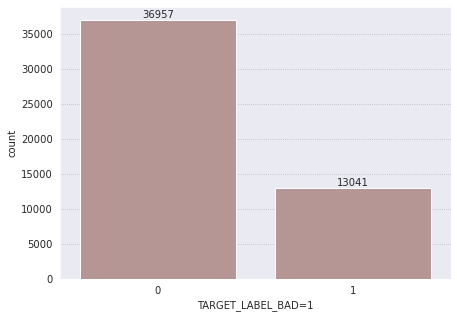

<Figure size 432x288 with 0 Axes>

In [32]:
values = CSdata_df['TARGET_LABEL_BAD=1'].value_counts()
index = list(values.index)
value = list(values)
fig,ax = plt.subplots()
fig.set_size_inches(7,5)
sns.countplot(x=CSdata_df['TARGET_LABEL_BAD=1'], color="rosybrown")
for a,b in zip(index, value):
    plt.text(a, b+0.01, b, ha='center', va='bottom')
plt.show()
plt.savefig('customer_demographic.png')

### 3.2 Variable Distribution<a id='variable_distribution'></a>

<Figure size 1152x720 with 0 Axes>

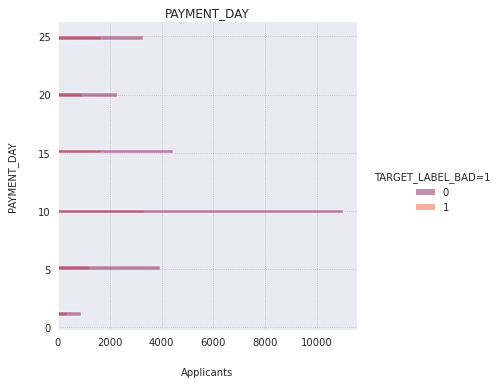

<Figure size 432x288 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

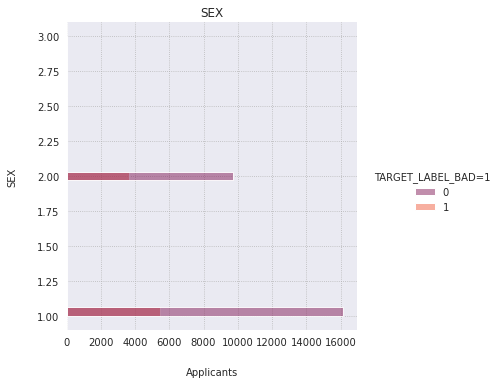

<Figure size 432x288 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

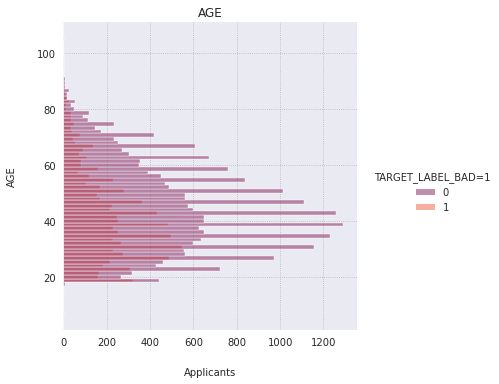

<Figure size 432x288 with 0 Axes>

In [33]:
variables = ["PAYMENT_DAY","SEX","AGE"]

for y in variables:
    plt.figure(figsize=(16, 10))
    #plot displot
    chart = sns.displot(
       data = X_train, 
       y = y,
       hue = 'TARGET_LABEL_BAD=1', 
       palette = "rocket",
       )

    #customize plot
    chart.set(title=y)
    plt.xlabel('Applicants', fontsize=10,labelpad=20)
    plt.ylabel(y, fontsize=10, labelpad=20)

    plt.show()
    plt.savefig('variable.png')

### 3.3 Monthly Income Analysis <a id='distribution3'></a>

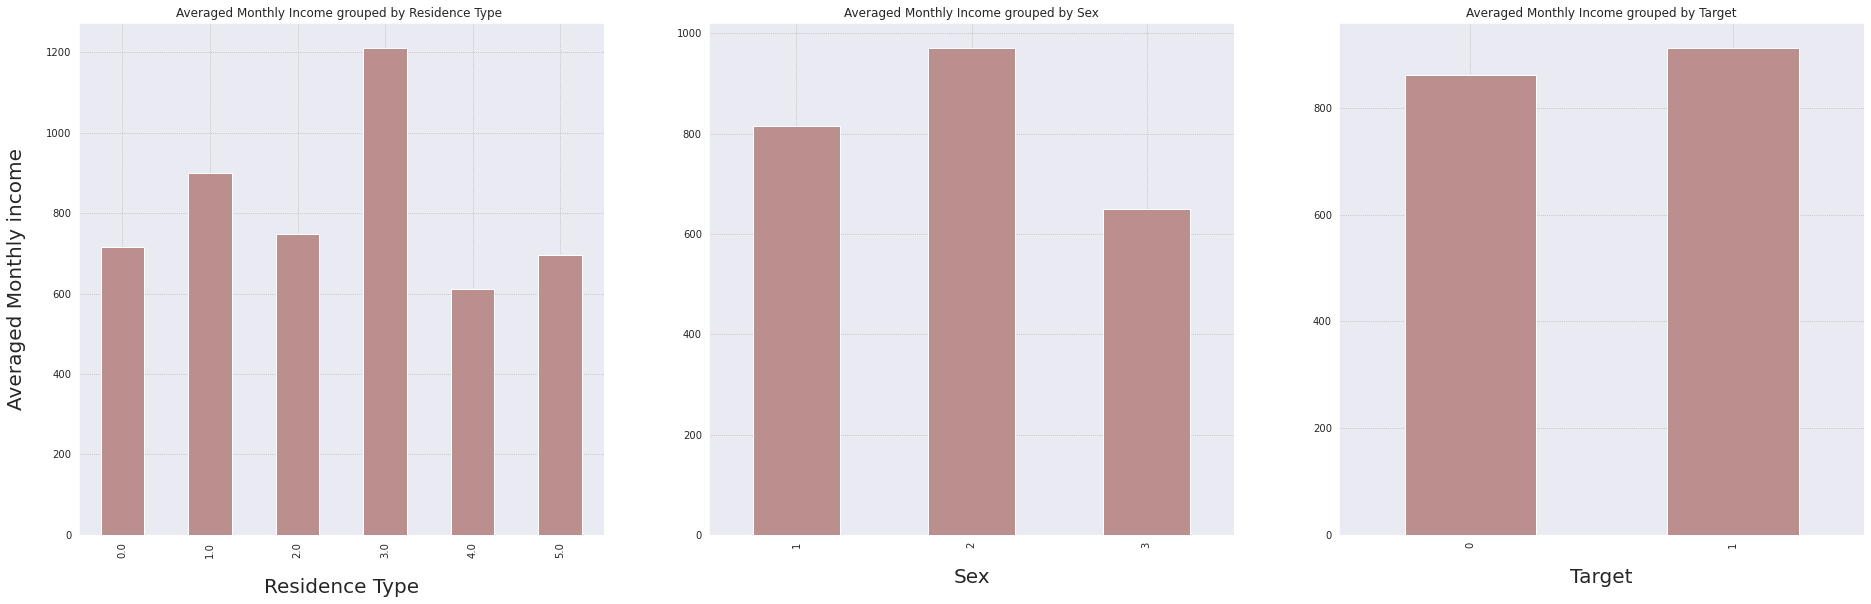

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(32, 32))
plt.subplot(331)
chart = X_train.groupby(X_train['RESIDENCE_TYPE'])['PERSONAL_MONTHLY_INCOME'].mean().plot.bar(color='rosybrown')
chart.set(title="Averaged Monthly Income grouped by Residence Type ")
plt.xlabel('Residence Type', fontsize=20,labelpad=20)
plt.ylabel('Averaged Monthly income', fontsize=20, labelpad=20)

plt.subplot(332)
chart = X_train.groupby(X_train['SEX'])['PERSONAL_MONTHLY_INCOME'].mean().plot.bar(color='rosybrown')
chart.set(title="Averaged Monthly Income grouped by Sex")
plt.xlabel('Sex', fontsize=20,labelpad=20)
plt.ylabel('', fontsize=20, labelpad=20)

plt.subplot(333)
chart = X_train.groupby(X_train['TARGET_LABEL_BAD=1'])['PERSONAL_MONTHLY_INCOME'].mean().plot.bar(color='rosybrown')
chart.set(title="Averaged Monthly Income grouped by Target")
plt.xlabel('Target', fontsize=20,labelpad=20)
plt.ylabel('', fontsize=20, labelpad=20)

plt.show()
plt.savefig('Monthly_Income_Analysis.png')

### 3.4 Gender Proportion <a id='distribution4'></a>

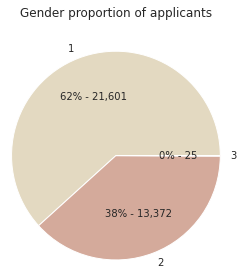

<Figure size 432x288 with 0 Axes>

In [35]:
#defining data
data = X_train['SEX'].value_counts()
labels = X_train['SEX'].value_counts().index
color = sns.color_palette('ch:s=-.2,r=.6')

# plotting data on pie chart
plt.pie(
    data,
    labels = labels, 
    colors = color,
    #lambda to calculate percentage with f string
    autopct=lambda x:f'{x:.0f}% - {x*sum(data)/100 :,.0f}',
    radius=1.2
    )
#add title and show plot
plt.title('Gender proportion of applicants',pad=30)  
plt.show()
plt.savefig('Gender_Proportion.png')

# 4. PREDICTION TECHNIQUES <a id='models'></a>

## 4.1 Simple Linear Regression <a id='simple_regression'></a>

In [36]:
X = CSdata_df.drop("TARGET_LABEL_BAD=1", axis=1).copy()
y = CSdata_df["TARGET_LABEL_BAD=1"].copy()

In [37]:
def run_regression(X_train, X_test, y_train, y_test, normalize=False):
    lm = LinearRegression(normalize=normalize)
    lm.fit(X_train, y_train)

    print('Training accuracy: {:.5f}'.format(lm.score(X_train, y_train)))
    print('Testing accuracy by using score function: {:.5f}'.format(lm.score(X_test, y_test)))
    print('Testing accuracy by using r2_score meric: {:.5f}'.format(r2_score(y_test, lm.predict(X_test))))

    return lm

In [38]:
def interccept_coefficients(model):
    print('Interccept: ', model.intercept_)
    print('Coefficients: ', model.coef_)
    return model.intercept_, model.coef_

In [39]:
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

simple_lr = run_regression(X_train_simple, X_test_simple, y_train_simple, y_test_simple)

Training accuracy: 0.02702
Testing accuracy by using score function: 0.02374
Testing accuracy by using r2_score meric: 0.02374


In [40]:
simple_lr_inter, simple_lr_coeff = interccept_coefficients(simple_lr)

Interccept:  0.2834169158661777
Coefficients:  [ 3.73172823e-03 -1.95738694e-02  2.74957439e-02 -2.60285394e-03
  3.44658661e-03  4.73352542e-05 -1.36782977e-02 -2.64775810e-04
  1.16001788e-01  7.00972340e-05  1.62963569e-03  2.70481040e-04
 -8.58896348e-03  3.81323096e-07  2.88833138e-06  1.29242178e-02
 -3.57740800e-02  1.06741117e-01 -3.01899081e-02  5.09581548e-02
  1.25839268e-02  2.66996517e-08 -1.71803029e-02 -1.20393779e-02
 -8.19936832e-03 -7.59525199e-04  4.15778612e-03  8.47091251e-03
 -3.76988881e-03 -4.10595875e-05]


### 4.1.1 Normality Assumption <a id='normality'></a>

    Creates predictions on the features with the model and calculates residuals
 
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.

    This assumption being violated primarily causes issues with the confidence intervals
 

In [41]:
def calculate_residuals(model, features, label):

    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    
    print('Assumption 1: The error terms are normally distributed', '\n')

    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)

    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)

    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()

    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 1: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


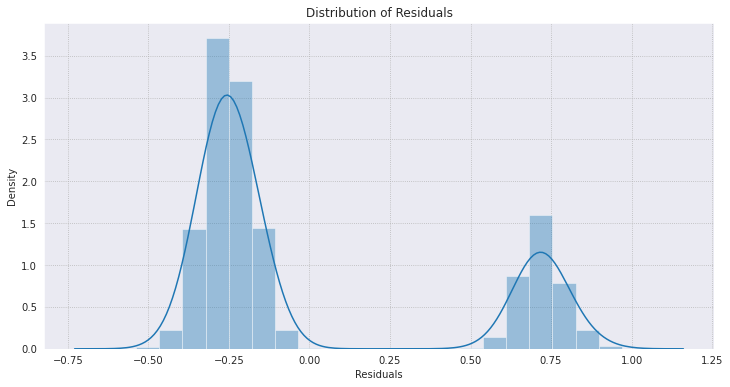


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [42]:
normal_errors_assumption(simple_lr, X_test_simple, y_test_simple)

### 4.1.2 Multicollinearity Assumption <a id='multicollinearity_assumption'></a>

In [43]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    print('Assumption 2: Little to no multicollinearity among predictors')

    # Plotting the heatmap
    plt.figure(figsize = (40,32))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    # plt.save()
    plt.show()

    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')

    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))

    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 2: Little to no multicollinearity among predictors


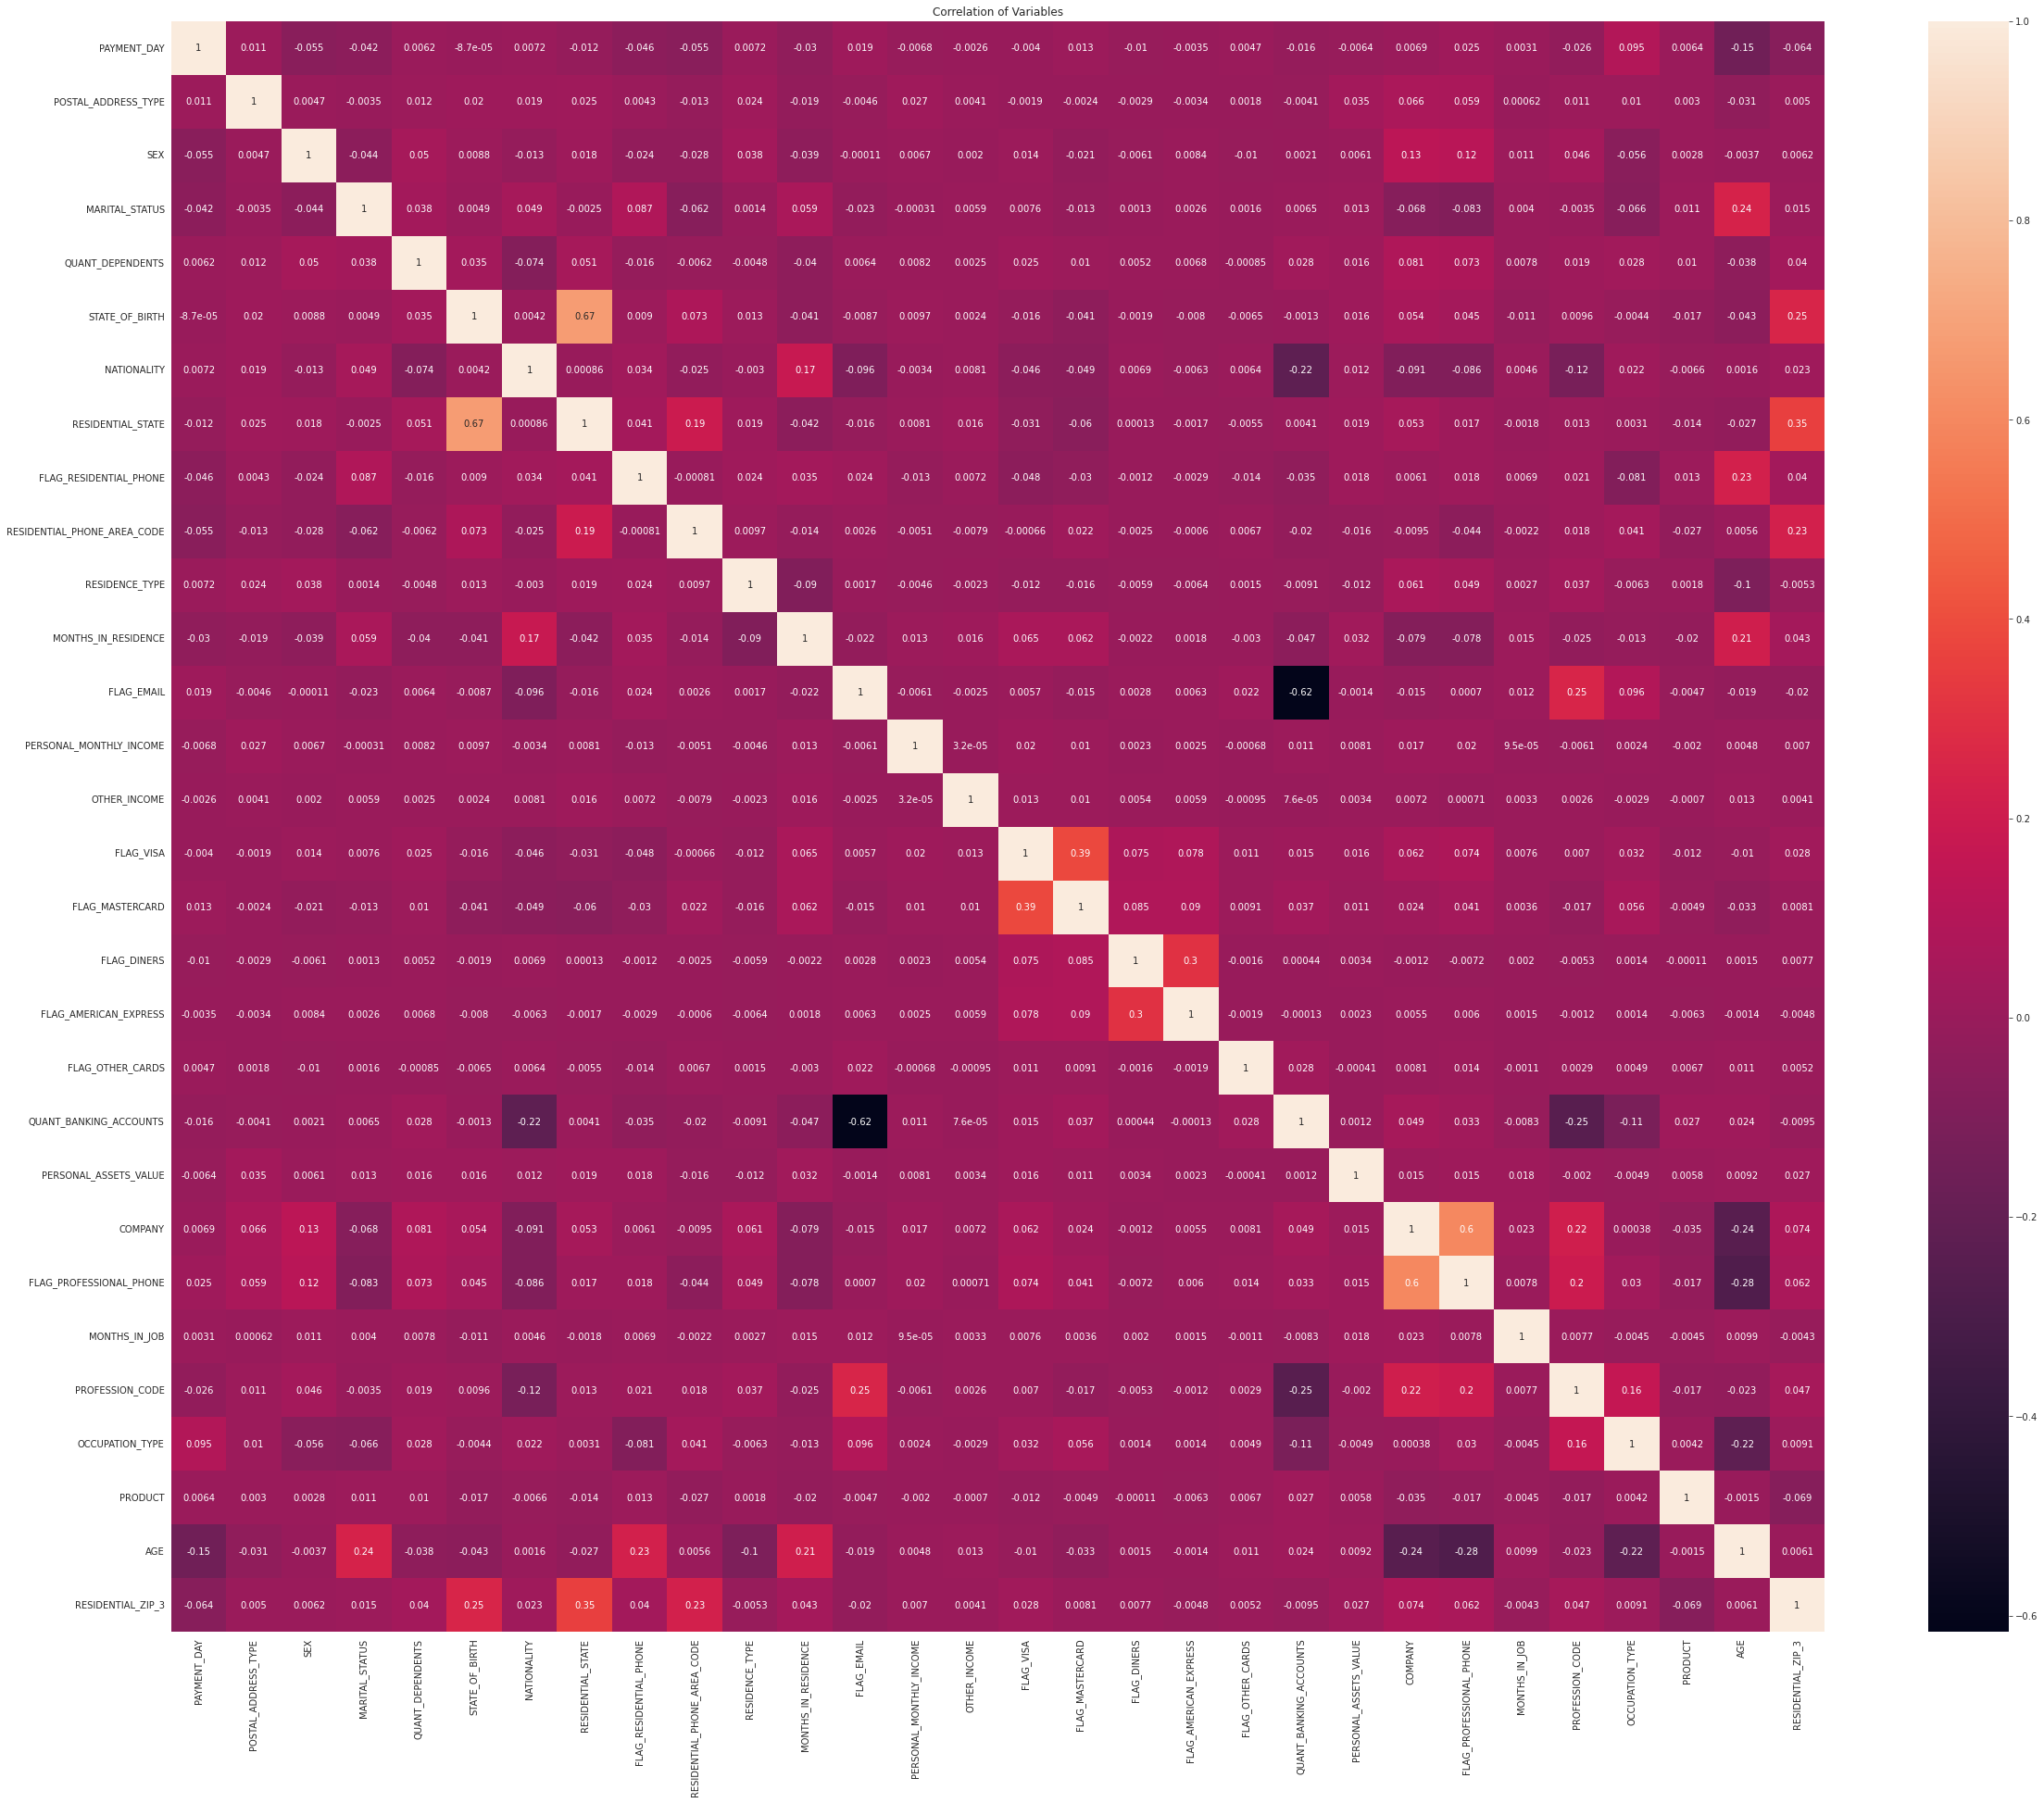

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
PAYMENT_DAY: 4.854568652746028
POSTAL_ADDRESS_TYPE: 72.03549498593219
SEX: 9.138149032517134
MARITAL_STATUS: 3.906875923210908
QUANT_DEPENDENTS: 1.3369772929659425
STATE_OF_BIRTH: 5.707271613366144
NATIONALITY: 24.688808242148262
RESIDENTIAL_STATE: 6.65341219769891
FLAG_RESIDENTIAL_PHONE: 11.592504538233978
RESIDENTIAL_PHONE_AREA_CODE: 4.123616429242155
RESIDENCE_TYPE: 3.168781341217816
MONTHS_IN_RESIDENCE: 2.1068484463929127
FLAG_EMAIL: 8.348528119743085
PERSONAL_MONTHLY_INCOME: 1.0149320753846147
OTHER_INCOME: 1.0028656928253694
FLAG_VISA: 1.3442758103771284
FLAG_MASTERCARD: 1.32682754019397
FLAG_DINERS: 1.1083884291613975
FLAG_AMERICAN_EXPRESS: 1.109646472783673
FLAG_OTHER_CARDS: 1.0069552648297306
QUANT_BANKING_ACCOUNTS: 2.7147293595456263
PERSONAL_ASSETS_VALUE: 1.0068141627505347
COMPANY: 15.4147051412

In [44]:
multicollinearity_assumption(simple_lr, X, y, X.columns)

## 4.2 Logistic Regression <a id='logistic_regression'></a>

In [45]:
X = CSdata_df.drop("TARGET_LABEL_BAD=1", axis=1).copy()
y = CSdata_df["TARGET_LABEL_BAD=1"].copy()
X = StandardScaler().fit_transform(X)
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### 4.2.1 SMOTE <a id='smote'></a>

In [46]:
sm = SMOTE(random_state=1)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [47]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)
predicted_1 = reg.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, predicted_1))
print("Testing Accuracy:", accuracy_score(y_test, predicted))
print("\nClassification Report:\n", classification_report(y_test, predicted))

Training Accuracy: 0.5840967953921682
Testing Accuracy: 0.5689333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.56      0.66     11088
           1       0.32      0.59      0.42      3912

    accuracy                           0.57     15000
   macro avg       0.56      0.57      0.54     15000
weighted avg       0.67      0.57      0.60     15000



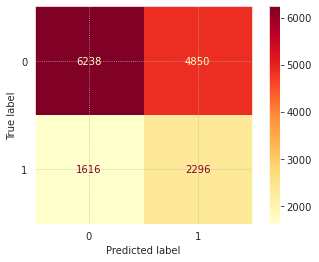

In [48]:
X, y = make_classification(random_state=0)
plot_confusion_matrix(reg.fit(X_train, y_train), X_test, y_test, cmap='YlOrRd')  
plt.show()

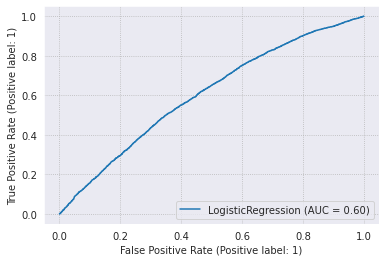

In [49]:
logistic_d = RocCurveDisplay.from_estimator(reg,X_test, y_test)
plt.savefig('logistic.png')

## 4.3 Decision Trees Classification <a id='decision_tree_regression'></a>

In [50]:
#X_train, X_test_si, y_train_simple, y_test_simple = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)
X = CSdata_df.drop("TARGET_LABEL_BAD=1", axis=1).copy()
y = CSdata_df["TARGET_LABEL_BAD=1"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sm = SMOTE(random_state=1)
X_train,y_train = sm.fit_resample(X_train,y_train)

decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train,y_train)
prediction = decision_tree.predict(X_test)
prediction_1 = decision_tree.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train,prediction_1))
print("Testing Accuracy:", accuracy_score(y_test,prediction))
print("\nClassification Report:\n", classification_report(y_test, prediction))

Training Accuracy: 0.6294986277011094
Testing Accuracy: 0.6266

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.74     11088
           1       0.31      0.34      0.32      3912

    accuracy                           0.63     15000
   macro avg       0.53      0.54      0.53     15000
weighted avg       0.64      0.63      0.63     15000



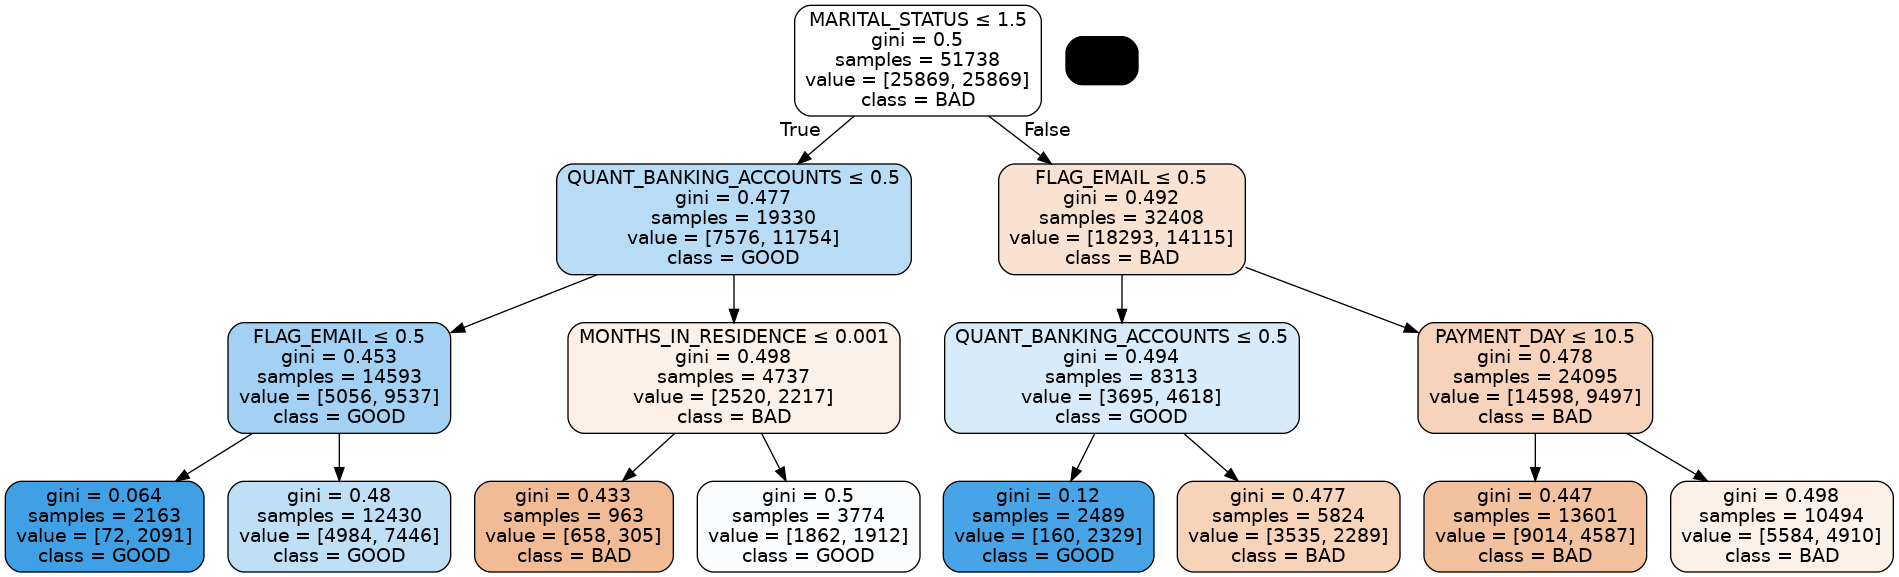

In [51]:
# create a file to store the figure in
dot_data = StringIO()

export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,class_names=['BAD','GOOD'],
                special_characters=True,feature_names=X.columns)

# Import and display the figure
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

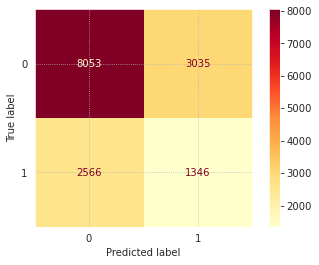

In [52]:
X, y = make_classification(random_state=0)
plot_confusion_matrix(decision_tree.fit(X_train,y_train), X_test, y_test, cmap='YlOrRd')  
plt.show()

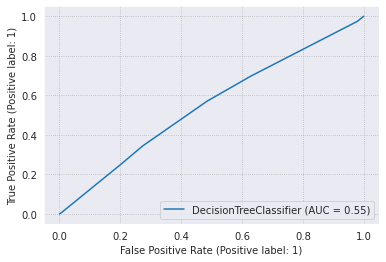

In [53]:
decision_tree_d = RocCurveDisplay.from_estimator(decision_tree,X_test, y_test)
plt.savefig('decision.png')

In [54]:
print('Feature Importance:\n')

for c, column in enumerate(X_test.columns):
    if decision_tree.feature_importances_[c] in sorted(decision_tree.feature_importances_)[-5:]:
        print(column,": ", decision_tree.feature_importances_[c])

Feature Importance:

PAYMENT_DAY :  0.06581806976472625
MARITAL_STATUS :  0.23467390356801301
MONTHS_IN_RESIDENCE :  0.01801619562231593
FLAG_EMAIL :  0.26696553644503435
QUANT_BANKING_ACCOUNTS :  0.41452629459991036


## 4.4 Random Forest <a id='random_forrest'></a>

In [55]:
X = CSdata_df.drop("TARGET_LABEL_BAD=1", axis=1).copy()
y = CSdata_df["TARGET_LABEL_BAD=1"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sm = SMOTE(random_state=1)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [56]:
param_grid = {"max_depth": [3,5,8,],
              "n_estimators":[10,15,20],
              "max_features": [10,20,30]}

#Creating the classifier
model = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=3, max_features=10, n_estimators=10;, score=0.275 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=10, n_estimators=10;, score=0.392 total time=   0.2s
[CV 3/5] END max_depth=3, max_features=10, n_estimators=10;, score=0.819 total time=   0.2s
[CV 4/5] END max_depth=3, max_features=10, n_estimators=10;, score=0.808 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=10, n_estimators=10;, score=0.745 total time=   0.2s
[CV 1/5] END max_depth=3, max_features=10, n_estimators=15;, score=0.264 total time=   0.3s
[CV 2/5] END max_depth=3, max_features=10, n_estimators=15;, score=0.365 total time=   0.3s
[CV 3/5] END max_depth=3, max_features=10, n_estimators=15;, score=0.839 total time=   0.3s
[CV 4/5] END max_depth=3, max_features=10, n_estimators=15;, score=0.822 total time=   0.3s
[CV 5/5] END max_depth=3, max_features=10, n_estimators=15;, score=0.806 total time=   0.3s
[CV 1/5] END max_d

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, 5, 8], 'max_features': [10, 20, 30],
                         'n_estimators': [10, 15, 20]},
             scoring='recall', verbose=4)

In [57]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.6522193339670441
{'max_depth': 8, 'max_features': 10, 'n_estimators': 20}


In [58]:
rf = RandomForestClassifier(max_depth=8,max_features=10, n_estimators=20, random_state=1)

#trainning with the best params
rclf = rf.fit(X_train, y_train)

In [59]:
y_pred = rf.predict(X_test)
y_pred_1 = rf.predict(X_train)

print("Training Accuracy: ", accuracy_score(y_train,y_pred_1))
print("Testing Accuracy: ", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy:  0.7824036491553596
Testing Accuracy:  0.7024

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82     11088
           1       0.34      0.15      0.21      3912

    accuracy                           0.70     15000
   macro avg       0.54      0.52      0.51     15000
weighted avg       0.64      0.70      0.66     15000



Confusion Matrix:


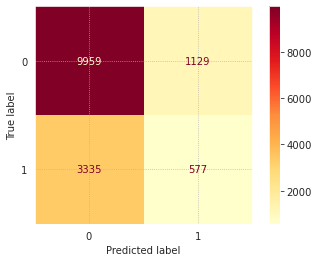

In [60]:
print("Confusion Matrix:")
X, y = make_classification(random_state=0)
plot_confusion_matrix(rclf, X_test, y_test, cmap='YlOrRd')  
plt.show()

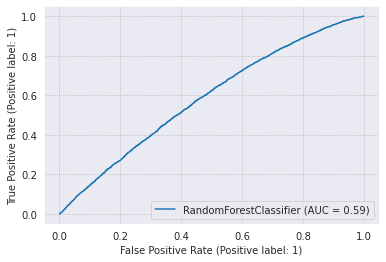

In [61]:
random_forest_d = RocCurveDisplay.from_estimator(rf,X_test, y_test)
plt.savefig('d.png')

In [62]:
# Random forest - 5 most important features
print("Feature Importance:\n")
for c, column in enumerate(X_test.columns):
    if rf.feature_importances_[c] in sorted(rf.feature_importances_)[-5:]:
        print(column, ": ", rf.feature_importances_[c])

Feature Importance:

PAYMENT_DAY :  0.12131762126128146
FLAG_EMAIL :  0.09135957315496677
QUANT_BANKING_ACCOUNTS :  0.07827134589807541
PROFESSION_CODE :  0.08373666396307114
OCCUPATION_TYPE :  0.2580137682394643


## 4.5 ADA Boosting <a id='ada_boosting'></a>

In [63]:
X = CSdata_df.drop("TARGET_LABEL_BAD=1", axis=1).copy()
y = CSdata_df["TARGET_LABEL_BAD=1"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sm = SMOTE(random_state=1)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [64]:
param_grid = {"n_estimators":[5,10,15,20,25,30,35,40,45,50],
              "learning_rate": [0,0.2,0.4,0.6,0.8,1]}

#Creating the classifier
model = AdaBoostClassifier(random_state=1)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....learning_rate=0, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END .....learning_rate=0, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END .....learning_rate=0, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END .....learning_rate=0, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END .....learning_rate=0, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END ....learning_rate=0, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END ....learning_rate=0, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END ....learning_rate=0, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END ....learning_rate=0, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END ....learning_rate=0, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END ....learning_rate=0, n_estimators=15;, score=nan total time=   0.0s
[CV 2/5] END ....learning_rate=0, n_estimators=

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'learning_rate': [0, 0.2, 0.4, 0.6, 0.8, 1],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50]},
             scoring='recall', verbose=4)

In [65]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.6774216739394454
{'learning_rate': 1, 'n_estimators': 25}


In [66]:
ada = AdaBoostClassifier(n_estimators=25,learning_rate = 1)
ada.fit(X_train,y_train.values.ravel())
ada_prediction = ada.predict(X_test)
ada_prediction_prob = ada.predict_proba(X_test)
ada_prediction_1 = ada.predict(X_train)

print("Training Accuracy: ", accuracy_score(y_train,ada_prediction_1))
print("Testing Accuracy: ", accuracy_score(y_test,ada_prediction))
print("\nClassification Report:\n", classification_report(y_test, ada_prediction))

Training Accuracy:  0.7201669952452743
Testing Accuracy:  0.6353333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75     11088
           1       0.31      0.33      0.32      3912

    accuracy                           0.64     15000
   macro avg       0.54      0.54      0.54     15000
weighted avg       0.64      0.64      0.64     15000



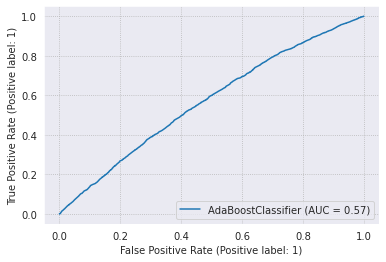

In [67]:
ada_boosting_d = RocCurveDisplay.from_estimator(ada,X_test, y_test)
plt.savefig('boosting.png')

In [68]:
# AdaBoost - 5 most important features
print("Feature Importance:\n")
for c, column in enumerate(X_test.columns):
    if ada.feature_importances_[c] in sorted(ada.feature_importances_)[-5:]:
        print(column, ": ", ada.feature_importances_[c])

Feature Importance:

PAYMENT_DAY :  0.12
RESIDENCE_TYPE :  0.16
MONTHS_IN_RESIDENCE :  0.08
PROFESSION_CODE :  0.08
OCCUPATION_TYPE :  0.24


## 4.6 Support Vector Classifier <a id='support_vector'></a>

In [69]:
X = CSdata_df.drop("TARGET_LABEL_BAD=1", axis=1).copy()
y = CSdata_df["TARGET_LABEL_BAD=1"].copy()
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sm = SMOTE(random_state=1)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [70]:
# Instantiate the Support Vector Classifier (SVC)
svc = svm.LinearSVC()
 
# Fit the model
clf = svc.fit(X_train, y_train)

In [71]:
# Make the predictions
y_predict = svc.predict(X_test)
y_predict_1 = svc.predict(X_train)
 
# Measure the performance
print("Training Accuracy: %.3f" %metrics.accuracy_score(y_train, y_predict_1))
print("Testing Accuracy: %.3f" %metrics.accuracy_score(y_test, y_predict))
print("\nClassification Report:\n",classification_report(y_test, y_predict))

Training Accuracy: 0.583
Testing Accuracy: 0.567

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.56      0.66     11088
           1       0.32      0.59      0.41      3912

    accuracy                           0.57     15000
   macro avg       0.56      0.57      0.54     15000
weighted avg       0.67      0.57      0.59     15000



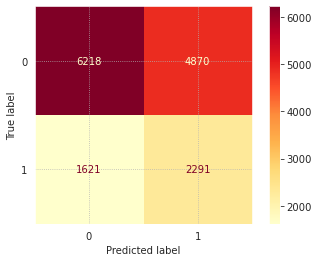

In [72]:
X, y = make_classification(random_state=0)
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')  
plt.show()

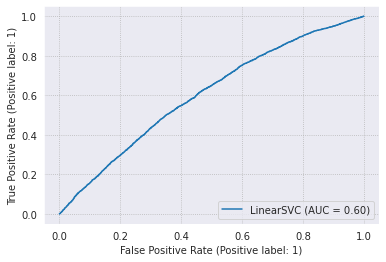

In [73]:
svc_d = RocCurveDisplay.from_estimator(svc,X_test, y_test)
plt.savefig('svc.png')

## 4.7 Neural Network <a id='neural_network'></a>

In [74]:
X = CSdata_df.drop("TARGET_LABEL_BAD=1", axis=1).copy()
y = CSdata_df["TARGET_LABEL_BAD=1"].copy()

for column in X.columns:
    if X[column].dtype == object:
        X = pd.concat([X,pd.get_dummies(X[column], prefix=column, drop_first=True)],axis=1).drop([column],axis=1)

# Scaling the input variables

X = StandardScaler().fit_transform(X)
y = pd.get_dummies(y, prefix='churn', drop_first=True)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [76]:
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

print('Input dimensions: ', input_dim)
print('Output dimensions: ', output_dim)

Input dimensions:  30
Output dimensions:  1


In [77]:
# Creating a model instance (Sequential, as we add each layer in order of appearance)
model = Sequential()

# Adding the input layer and connect to 50 hidden neurons
model.add(Dense(50,input_dim=input_dim))

# Connecting the neurons to the next 50 neurons; this is your second hidden layer
model.add(Dense(50))

# Connecting the previous layer to the output layer; note we specify the output dimensions here
model.add(Dense(output_dim))

# Adding a final layer for classification based on the sigmoid function (since this is binary)
model.add(Activation('sigmoid'))

# Creating the model with an optimizer, loss function, and evaluation metric.
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

2022-12-13 01:48:42.157283: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-13 01:48:42.157327: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-13 01:48:42.157362: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (noteable): /proc/driver/nvidia/version does not exist
2022-12-13 01:48:42.157733: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [78]:
# Fiting the above specified model with the training data
model.summary()
model.fit(X_train,y_train)

# Testing the model on our test data and obtain the results as predicted probabilities
prediction_prob = model.predict(X_test)
print(prediction_prob)

# Obtaining the results as a class (here 0/1)
classes=(prediction_prob > 0.5).astype("int32")
print(classes)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1550      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 4,151
Trainable params: 4,151
Non-trainable params: 0
_________________________________________________________________
469/469 [==============================] - 0s 885us/step
[[0.3018734 ]
 [0.2323036 ]
 [0.36600035]
 ...
 [0.25239193]
 [0.19179638]
 [0.14410874]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [79]:
print('Testing Accuracy:', accuracy_score(y_test,classes))
print('AUC:',roc_auc_score(y_test,prediction_prob))

Testing Accuracy: 0.7338
AUC: 0.5900000385382299


# 5. Conclusions <a id='conclusion'></a>

## 5.1 Model Evaluation <a id='evaluation'></a>

In [81]:
# Display Model Evaluation data
data = [["Logistic Regression", 56.89, 0.6], 
        ["Decision Tree Classifier", 62.66, 0.55], 
        ["Random Forrest Classifier", 70.24, 0.59],
        ["ADA Boosting", 63.5, 0.57],
        ["Support Vector Machine", 56.7, 0.6 ], 
        ["Neural-Network", 73.38, 0.59 ]]
  
# Define table header names
col_names = ["MODEL", "TEST ACCURACY SCORE(%)", "AUC SCORE"]
  
# Display table data
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════════════════╤══════════════════════════╤═════════════╕
│ MODEL                     │   TEST ACCURACY SCORE(%) │   AUC SCORE │
╞═══════════════════════════╪══════════════════════════╪═════════════╡
│ Logistic Regression       │                    56.89 │        0.6  │
├───────────────────────────┼──────────────────────────┼─────────────┤
│ Decision Tree Classifier  │                    62.66 │        0.55 │
├───────────────────────────┼──────────────────────────┼─────────────┤
│ Random Forrest Classifier │                    70.24 │        0.59 │
├───────────────────────────┼──────────────────────────┼─────────────┤
│ ADA Boosting              │                    63.5  │        0.57 │
├───────────────────────────┼──────────────────────────┼─────────────┤
│ Support Vector Machine    │                    56.7  │        0.6  │
├───────────────────────────┼──────────────────────────┼─────────────┤
│ Neural-Network            │                    73.38 │        0.59 │
╘═════

**Observations:** 

    It is evident from the summarised performance table above the models which perform well are Neural Networks followed by Random Forest and ADA Boosting.
    
    Since Neural Network is a computationally expensive model to incorporate, it is recommended that this model be adapted based on budgetary and equipmental constraints.
    
    Random Forest and ADA Boosting are models recommended when such contraints are not met.